In [1]:
import pygmt
import pandas as pd
import numpy as np
import obspy
from pyproj import Proj
p = Proj(proj='utm' ,zone=10 ,ellps='WGS84' ,datum='WGS84' ,units='m')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2D no stat corr
# D2nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2Dnsc.cat')
D2nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2Dnsc512Wids.cat')
# D2nscQC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2DnscWidsQC.cat')
D2nscQC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2Dnsc512WidsQC.cat')
# df1 = D2nscQC


# 2D w/ Station Corrections
# D2sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2Dsc.cat')
# D2sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2DscWids.cat')


# 3D no stat corr
# D3nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3Dnsc.cat')
D3nsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3DnscWids.cat')
D3nscQC = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3DnscWidsQC.cat')
# df2 = D3nscQC

# 3D w/ Station Corrections
# D3sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3Dsc.cat')
# D3sc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3DscWids.cat')


#cvm no stat corr
# CVMnsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMnsc.cat')
# CVMnsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMnscWids.cat')


# cvm w/ Station Corrections 
# CVMsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMsc.cat')
# CVMsc = pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/cvmCat/bremUp_CVMscWids.cat')

# Hypoinverse:
cat = pd.read_csv('/Users/banjo/Projects/nll_pnsn/bremerton/bremUpdated.cat')

# Reid Merrill's relocations 
# MVM=pd.read_csv('/Users/banjo/Projects/nll_pnsn/util/catalogs/bremUp_MVM.cat')

# event_id_s for locations in nlloc 
# event_ids=pd.read_csv('/Users/banjo/Projects/nll_pnsn/NLLoc/test/brem2D/loc/event_ids')

In [39]:
D2nsc.head(5)

,ot,loc,rms,nphs,gap,d2ns,eLL1,eLL2,eLL3,mlat,mlon,mdep,exlat,exlon,exdep,evids,DIFF,avgLen,maxLen
0,1996-03-07T18:20:15.589,LOCATED,0.294337,22,57.0129,18.1389,15.2654,4.34687,3.52765,47.577466,-122.551545,21.011719,47.576650,-122.549997,19.811210,10391093,0.147628,7.713307,15.2654
1,1996-05-16T04:25:43.460,LOCATED,0.031714,4,312.2600,60.8176,137.8810,52.74920,26.53190,47.754750,-122.030139,34.218750,47.867461,-121.932134,23.785232,10405793,14.523434,72.387367,137.8810
2,1996-07-23T13:16:54.405,LOCATED,0.250966,12,66.1063,18.5377,15.9879,3.63208,3.24542,47.560582,-122.543002,12.589844,47.564720,-122.549186,14.986928,10405558,0.654396,7.621800,15.9879
3,1996-08-30T18:28:56.309,LOCATED,0.362847,13,58.3340,18.9279,16.6853,4.20556,3.75637,47.563959,-122.538175,21.777344,47.567059,-122.535241,21.387950,10407443,0.409314,8.215743,16.6853
4,1996-12-01T13:43:09.580,LOCATED,0.019941,4,282.8140,23.0996,214.8600,95.10570,26.58790,47.612923,-122.496144,21.203125,47.122109,-122.489283,24.294723,10408683,54.570183,112.184533,214.8600


In [40]:
D3nsc.head(5)

,ot,loc,rms,nphs,gap,d2ns,eLL1,eLL2,eLL3,mlat,mlon,mdep,exlat,exlon,exdep,DIFF,avgLen,maxLen,evids
0,1996-03-07T18:20:15.581,LOCATED,0.294581,22,57.0129,18.1389,15.2158,4.24375,3.38709,47.577466,-122.551545,21.011719,47.576824,-122.551009,19.851338,0.081982,7.615547,15.2158,10391093
1,1996-05-16T04:25:44.925,LOCATED,0.029265,4,306.2320,50.7943,124.4670,51.20450,26.05970,47.700721,-122.145560,31.156250,47.885069,-121.934031,24.911298,25.909451,67.243733,124.4670,10405793
2,1996-07-23T13:16:54.394,LOCATED,0.252237,12,66.1063,18.5377,15.3580,3.55807,3.28087,47.560582,-122.543002,12.589844,47.564015,-122.547996,14.772091,0.535655,7.398980,15.3580,10405558
3,1996-08-30T18:28:56.295,LOCATED,0.364176,13,58.3340,18.9279,16.4550,4.37978,3.87724,47.563959,-122.538175,21.777344,47.567470,-122.536885,21.860221,0.402248,8.237340,16.4550,10407443
4,1996-12-01T13:43:09.568,LOCATED,0.024966,4,282.8140,23.0996,218.5300,91.72320,26.54480,47.612923,-122.496144,21.203125,47.122141,-122.489135,24.086484,54.566733,112.266000,218.5300,10408683


In [5]:
d3 = D3nsc['evids'].values
d2 = D2nsc['evids'].values
dup = []
ind = []
for i in range(len(d2)):
    a = d2[i]
    for j in range(len(d3)):
        b = int(d3[j])
        if a == b:
            dup.append(j)
#             break
        else:
            ind.append(j)

In [6]:
len(dup)
# ind

399

In [7]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))
# Driver Code
d3 = D3nsc['evids'].values
d2 = D2nsc['evids'].values
li1 = d3
li2 = d2
diff = Diff(li2, li1)

In [8]:
diff = np.array(diff)

In [9]:
# a=[]
# for i in range(len(diff)):
#     d1 = diff[i]
# #     row = D3nsc.loc[icat['evid']== evid].values[0]
#     df3 = D3nsc.loc[D3nsc['evids']== d1].index[0]
#     print(df3)
#     a.append(df3)
#     ap = np.sort(a)
#     ap = np.flip(ap)

In [10]:
# D3nsc = D3nsc.drop(ap)

In [11]:
# D3nsc.reset_index()

In [12]:
D2nsc

,ot,loc,rms,nphs,gap,d2ns,eLL1,eLL2,eLL3,mlat,mlon,mdep,exlat,exlon,exdep,evids,DIFF,avgLen,maxLen
0,1996-03-07T18:20:15.589,LOCATED,0.294337,22,57.0129,18.13890,15.26540,4.34687,3.52765,47.577466,-122.551545,21.011719,47.576650,-122.549997,19.811210,10391093,0.147628,7.713307,15.26540
1,1996-05-16T04:25:43.460,LOCATED,0.031714,4,312.2600,60.81760,137.88100,52.74920,26.53190,47.754750,-122.030139,34.218750,47.867461,-121.932134,23.785232,10405793,14.523434,72.387367,137.88100
2,1996-07-23T13:16:54.405,LOCATED,0.250966,12,66.1063,18.53770,15.98790,3.63208,3.24542,47.560582,-122.543002,12.589844,47.564720,-122.549186,14.986928,10405558,0.654396,7.621800,15.98790
3,1996-08-30T18:28:56.309,LOCATED,0.362847,13,58.3340,18.92790,16.68530,4.20556,3.75637,47.563959,-122.538175,21.777344,47.567059,-122.535241,21.387950,10407443,0.409314,8.215743,16.68530
4,1996-12-01T13:43:09.580,LOCATED,0.019941,4,282.8140,23.09960,214.86000,95.10570,26.58790,47.612923,-122.496144,21.203125,47.122109,-122.489283,24.294723,10408683,54.570183,112.184533,214.86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2021-02-12T16:11:13.264,LOCATED,0.172214,10,169.2070,17.45160,18.76120,6.34335,5.95819,47.582531,-122.595671,23.117188,47.589256,-122.581443,20.032495,61501523,1.305552,10.354247,18.76120
395,2021-02-12T16:54:39.649,LOCATED,0.400833,38,100.5800,8.83978,5.36625,3.21924,1.74987,47.561426,-122.586141,26.275391,47.563744,-122.582679,25.866892,61703577,0.366463,3.445120,5.36625
396,2021-02-12T20:28:01.405,LOCATED,0.401176,44,101.3010,10.32140,4.92497,2.75094,1.85226,47.573245,-122.576256,25.701172,47.573251,-122.576514,25.595088,61703602,0.019423,3.176057,4.92497
397,2021-02-12T21:46:15.658,LOCATED,0.135238,13,192.9960,20.85280,18.52870,6.98640,2.92774,47.601104,-122.522406,16.800781,47.597687,-122.534033,15.932524,61703617,0.953334,9.480947,18.52870


In [13]:
##Function to qc the catalogs with evids""

# def qc_cat(df,ofile):
#     z2= df['mdep'].values*1.5
#     d2 = df['d2ns'].values
#     gap = df['gap'].values
#     idx = []
#     lb = []
#     for i in range(len(z2)):
#         z = z2[i]
#         if d2[i] <= z:
#             idx.append(1)
#             lb.append(i)
#         else:
#             idx.append(0)
#     dfj = df.loc[lb]
#     gaps = []
#     for i in range(len(gap)):
#         g = gap[i]
#         if g < 180:
#             gaps.append(i)
#     dfj=df.loc[gaps]
#     dfj.to_csv(ofile, index=0)
#     return dfj

# ofile1 = '/Users/banjo/Projects/nll_pnsn/util/catalogs/2DCat/bremUp_2DnscWidsQC.cat'
# ofile2 = '/Users/banjo/Projects/nll_pnsn/util/catalogs/3DCat/bremUp_3DnscWidsQC.cat'
# dfi = qc_cat(D2nsc,ofile1)
# dfk = qc_cat(D3nsc,ofile2)

In [14]:
def plot_xsec_comp(df1,df2,color1,color2,label1,label2,save):
    
    ''' 
        Function to plot the locations at depth with a NS xsection line and 
        a EW xsection line. 
        EW xsection line is 1 degree 
        NS xsection liune is 0.5 degree. 
        Input: 
            df1: pandas dataframe the catalog 1 of interest
            df2: pandas dataframe  the 2nd catalog of interest
            color1: string matplot lib color for plotting
            color2: string matplot lib color for plotting
            label1: string name of df1
            label2: string name of df2
            save: 1 if you want to save it, 0 if you dont. 
        Returns 3 plots of lat lon and dep 
    '''
    fig = pygmt.Figure()
    pygmt.config(MAP_FRAME_TYPE="plain")
    pygmt.config(MAP_FRAME_AXES='NesW')
    pygmt.config(FORMAT_GEO_MAP="ddd.x")


    ##
    ### Top Left ###
    ##
    r1 = [-123.0,-122.0,0,55.55]
    fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")

    fig.plot(x = df1['mlon'].values, y = df1['mdep'].values,
         style = 'c0.08c',color = color1,pen = 'black',label= label1)

    fig.shift_origin(xshift= "4.5i")
    ##
    ### Top Right ##
    ##
    r1 = [-123.0,-122.0,0,55.55] 
    fig.basemap(region=r1,frame="a10.0f -JX4i/-2i")

    fig.plot(x = df2['mlon'].values, y = df2['mdep'].values,
         style = 'c0.08c',color = color2 ,pen = 'black',label=label2)

    fig.legend()

    fig.shift_origin(xshift= "-4.5i",yshift= "-2.25i")

    ##
    ### Bottom Left ##
    ##

    r3 = [47.25,47.750,0,55.55]

    fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")

    fig.plot(x = df1['mlat'].values, y = df1['mdep'].values,
         style = 'c0.08c',color = color1 ,pen = 'black',label=label1)

    fig.shift_origin(xshift= "4.5i")

    ##
    ##Bottom Right ##
    ##
    r3 = [47.250,47.750,0,55.55]
    fig.basemap(region=r3,frame="a10.0f -JX2i/-2i -BNseW")

    fig.plot(x = df2['mlat'].values, y = df2['mdep'].values,
         style = 'c0.08c',color = color2 ,pen = 'black',label=label2)

#     fig.show()
    if save == 1:
        fig.savefig('/Users/banjo/Desktop/bremComp/' + label1 +'_vs_'+ label2+'.png')
    else:
        fig.show()
        
    return fig

In [54]:
def diff_plot(df1,df2,color,name1,name2,save):
    ''' 
    Function to plot the differences in Lat, Lon and Depth
    Input: 
        df1: pandas dataframe the catalog 1 of interest
        df2: pandas dataframe  the 2nd catalog of interest
        color: string matplot lib color for plotting
        name1: string name of df1
        name2: string name of df2
    Returns 3 plots of lat lon and dep 
    '''

    df1mlat = df1['mlat'].values
    df2mlat = df2['mlat'].values
    df1Lon = df1['mlon'].values
    df2Lon = df2['mlon'].values

    df1Coord = [df1Lon,df1mlat]
    df2Coord = [df2Lon,df2mlat]

    df1utm = p(df1Coord[0],df1Coord[1])
    df1utme=df1utm[0]
    df1utmn=df1utm[1]


    df2utm = p(df2Coord[0],df2Coord[1])
    df2utme=df2utm[0]
    df2utmn=df2utm[1]

    dx = df1utme - df2utme
    dy = df1utmn - df2utmn

    df1dep = df1['mdep'].values
    df2dep = df2['mdep'].values
    ddep = df1dep - df2dep
    ddep = ddep*1000
    
    #plot 1:
    plt.figure(figsize=(10,15))
    plt.subplot(3, 1, 1)
    markerline, stemlines, baseline = plt.stem(
        range(len(df1['evids'].values)),dx, linefmt='grey', markerfmt='o', bottom=0,basefmt='black')
    markerline.set_markerfacecolor('white')
    markerline.set_markeredgecolor(color)
    plt.ylabel('difference (m)')
    plt.ylim([-5000.,5000.])
#     plt.ylim([-5000.,5000.])


    plt.xlabel('events')
    plt.title('Latitude: '+ str(name1) +' minus ' +str(name2))
    plt.grid()
    plt.show()

    plt.figure(figsize=(10,15))
    plt.subplot(3, 1, 2)
    markerline, stemlines, baseline = plt.stem(
        range(len(df1['evids'].values)),dy, linefmt='grey', markerfmt='o', bottom=0,basefmt='black')
    markerline.set_markerfacecolor('white')
    markerline.set_markeredgecolor(color)
    plt.ylabel('difference (m)')
    plt.ylim([-5000.,5000.])
#     plt.ylim([-5000.,5000.])


    plt.xlabel('events')
    plt.title('Longitude: '+ str(name1) +' minus ' +str(name2))
    plt.grid()
    plt.show()

    #plot 3:
    plt.figure(figsize=(10,15))
    plt.subplot(3, 1, 3)
    markerline, stemlines, baseline = plt.stem(
        range(len(df1['evids'].values)),ddep, linefmt='grey', markerfmt='o', bottom=0,basefmt='black')
    markerline.set_markerfacecolor('white')
    markerline.set_markeredgecolor(color)
    plt.ylabel('difference (m)')
    plt.ylim([-35000.,35000.])
    plt.xlabel('events')
    plt.title('Depth: '+ str(name1) +' minus ' +str(name2))
    plt.grid()
    plt.show()
    
    if save == 1:
        plt.savefig('/Users/banjo/Desktop/' + name1 +'_minus_'+ name2+'.pdf')
#     else:
#         plt.show()

In [48]:
# diff_plot(D2nsc,D3nsc,'seagreen','D2nsc','D3nsc',0)
# diff_plot(cat,CVMnsc,'navy','PNSN','CVMnsc',0)
# diff_plot(cat,CVMsc,'black','PNSN','CVMsc',0)
# diff_plot(cat,D2nsc,'firebrick','PNSN','D2nsc',0)
# diff_plot(cat,D3nsc,'purple','PNSN','D3nsc',0)

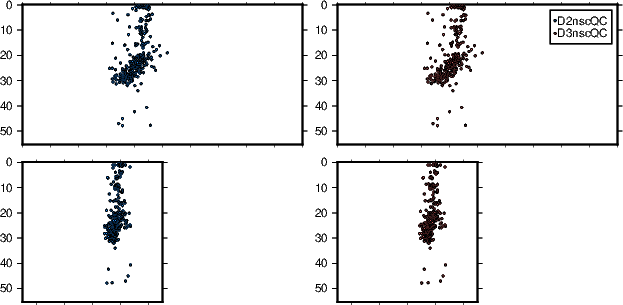

In [49]:
# diff_plot(D2sc,D3sc,'seagreen','D2sc','D3sc',0)
# plot_xsec_comp(D2sc,D3sc,'seagreen','firebrick','D2sc','D3sc',0)


# diff_plot(D2nsc,D3nsc,'seagreen','D2nsc','D3nsc',0)
plot_xsec_comp(D2nscQC,D3nscQC,'dodgerblue','indianred','D2nscQC','D3nscQC',0)

# diff_plot(cat,D2nsc,'firebrick','PNSN','D2nsc',0)
# plot_xsec_comp(cat,D2nsc,'dodgerblue','mediumpurple1','PNSN','D2nsc',0)


# # diff_plot(cat,CVMsc,'black','PNSN','CVMsc',0)
# # plot_xsec_comp(CVMsc,D3sc,'coral','firebrick','CVMsc','D3sc',0)


# # diff_plot(cat,CVMnsc,'black','PNSN','CVMnsc',0)
# plot_xsec_comp(cat,CVMnsc,'coral','mediumpurple1','PNSN','CVMnsc',0)




# # diff_plot(D2nsc,D3nsc,'seagreen','D2nsc','D3nsc',0)
# # diff_plot(CVMnsc,cat,'navy','CVMnsc','PNSN',0)
# # diff_plot(cat,CVMsc,'black','PNSN','CVMsc',0)
# # diff_plot(cat,D2nsc,'firebrick','PNSN','D2nsc',0)
# diff_plot(cat,D3nsc,'purple','PNSN','D3nsc',0)

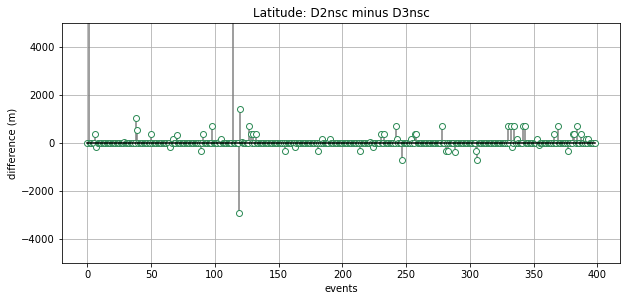

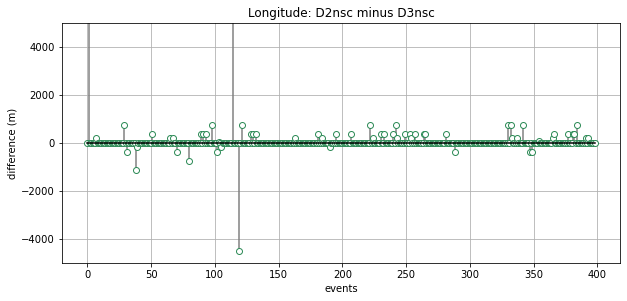

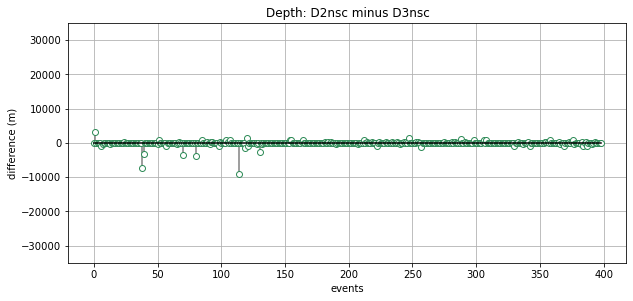

<Figure size 432x288 with 0 Axes>

In [55]:
diff_plot(D2nsc,D3nsc,'seagreen','D2nsc','D3nsc',1)
# diff_plot(CVMnsc,cat,'navy','CVMnsc','Hypoinverse',0)
# diff_plot(cat,CVMsc,'black','Hypoinverse','CVMsc',0)
# diff_plot(cat,D2nsc,'firebrick','Hypoinverse','D2nsc',0)
# diff_plot(cat,D3nsc,'purple','Hypo','D3nsc',0)

In [19]:
df1 = D2nsc
df2 = D3nsc
df1mlat = df1['mlat'].values
df2mlat = df2['mlat'].values
df1Lon = df1['mlon'].values
df2Lon = df2['mlon'].values

df1Coord = [df1Lon,df1mlat]
df2Coord = [df2Lon,df2mlat]

df1utm = p(df1Coord[0],df1Coord[1])
df1utme=df1utm[0]
df1utmn=df1utm[1]


df2utm = p(df2Coord[0],df2Coord[1])
df2utme=df2utm[0]
df2utmn=df2utm[1]

dx = df1utme - df2utme
dy = df1utmn - df2utmn

df1dep = df1['mdep'].values
df2dep = df2['mdep'].values
ddep = df1dep - df2dep
ddep = ddep*1000

dgap = D2nsc['gap'].values - D3nsc['gap'].values
dd2ns = D2nsc['d2ns'].values - D3nsc['d2ns'].values
dnphs = D2nsc['nphs'].values - D3nsc['nphs'].values
evids = D2nsc['evids'].values



In [20]:
ddf = pd.DataFrame(list(zip(evids,dx,dy,ddep,dnphs,dgap,dd2ns)),columns =[['evids','dx','dy','dz','dnphs','dgap','dd2ns']])

Text(0, 0.5, 'difference in stations used')

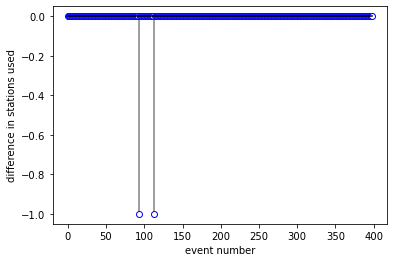

In [53]:
# markerline, stemlines, baseline = plt.stem(
#     range(len(df1['evids'].values)),dgap, 
#     linefmt='grey', markerfmt='o', bottom=0,basefmt='black')
# markerline.set_markerfacecolor('white')
# markerline.set_markeredgecolor('red')
markerline, stemlines, baseline = plt.stem(
    range(len(df1['evids'].values)),dnphs, 
    linefmt='grey', markerfmt='o', bottom=0,basefmt='black')
markerline.set_markerfacecolor('white')
markerline.set_markeredgecolor('blue')
plt.xlabel('event number')
plt.ylabel('difference in stations used')

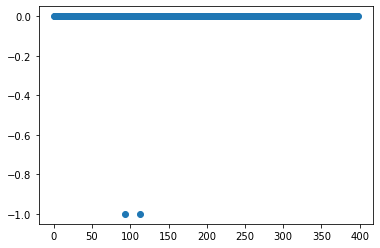

In [22]:
plt.scatter(range(len(dnphs)),dnphs)

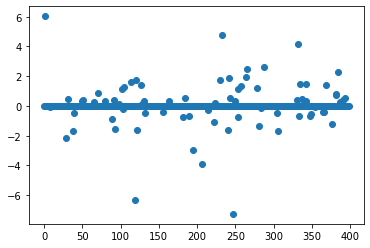

In [23]:
plt.scatter(range(len(dgap)),dgap)

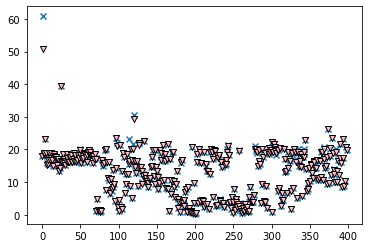

In [24]:
plt.scatter(range(len(D2nsc['d2ns'].values)),D2nsc['d2ns'].values,marker = 'x')
plt.scatter(range(len(D3nsc['d2ns'].values)),D3nsc['d2ns'].values,color = 'pink',marker = 'v',edgecolor='k')

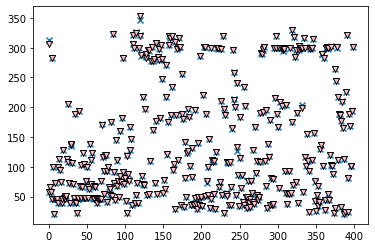

In [25]:
plt.scatter(range(len(D2nsc['gap'].values)),D2nsc['gap'].values,marker = 'x')
plt.scatter(range(len(D3nsc['gap'].values)),D3nsc['gap'].values,color = 'pink',marker = 'v',edgecolor='k')

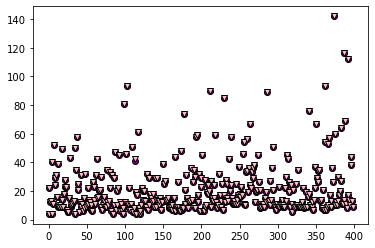

In [26]:
plt.scatter(range(len(D2nsc['nphs'].values)),D2nsc['nphs'].values,color = 'purple',marker = 'o',edgecolor='k')
plt.scatter(range(len(D3nsc['nphs'].values)),D3nsc['nphs'].values,color = 'pink',marker = 'v',edgecolor='k')
# plt.scatter(range(len(ddf['dnphs'].values)),ddf['dnphs'].values,color = 'yellow',marker = 'v',edgecolor='k')

In [27]:
## 2Dnsc 2D w/ no Stn Corrections Location Path,Input,Outputs
path = '/Users/banjo/Projects/nll_pnsn/NLLoc/outHypParse'
df1 = pd.read_csv(path+'/bremUP_2DNSC512.txt')
## 3Dnsc 3D w/ no Stn Corrections Location Path,Input,Outputs
path = '/Users/banjo/Projects/nll_pnsn/NLLoc/outHypParse'
df2 = pd.read_csv(path+'/bremUP_3DNSC.txt')

In [28]:
df1.columns

Index(['OT', 'evids', 'NLLOC', 'RMS', 'Nphs', 'Gap', 'Dist',
       'semiMajorAxisLength', 'semiMinorAxisLength',
       'semiIntermediateAxisLength', 'majorAxisPlunge', 'majorAxisAzimuth',
       'majorAxisRotation', 'mLat', 'mLong', 'mDepth', 'ExpectLat', 'exLong',
       'exDepth', 'VpVsRatio', 'Npair', 'Diff', 'assocPhCt', 'usedPhCt',
       'assocStaCt', 'usedStaCt', 'horUnc', 'minHorUnc', 'maxHorUnc',
       'azMaxHorUnc'],
      dtype='object')

In [29]:
df1

,OT,evids,NLLOC,RMS,Nphs,Gap,Dist,semiMajorAxisLength,semiMinorAxisLength,semiIntermediateAxisLength,...,Npair,Diff,assocPhCt,usedPhCt,assocStaCt,usedStaCt,horUnc,minHorUnc,maxHorUnc,azMaxHorUnc
0,1996-03-07T18:20:15.589,10391093,LOCATED,0.294337,22,57.0129,18.13890,15.26540,3.52765,4.34687,...,0,-2.000000e+30,27,22,-1,22,-1,2.93574,3.74235,116.0270
1,1996-05-16T04:25:43.460,10405793,LOCATED,0.031714,4,312.2600,60.81760,137.88100,26.53190,52.74920,...,0,-2.000000e+30,4,4,-1,4,-1,42.54670,111.29600,12.3964
2,1996-07-23T13:16:54.405,10405558,LOCATED,0.250966,12,66.1063,18.53770,15.98790,3.24542,3.63208,...,0,-2.000000e+30,14,12,-1,12,-1,2.75004,3.12955,150.0190
3,1996-08-30T18:28:56.309,10407443,LOCATED,0.362847,13,58.3340,18.92790,16.68530,3.75637,4.20556,...,0,-2.000000e+30,13,13,-1,13,-1,3.08502,3.46811,47.8996
4,1996-12-01T13:43:09.580,10408683,LOCATED,0.019941,4,282.8140,23.09960,214.86000,26.58790,95.10570,...,0,-2.000000e+30,4,4,-1,4,-1,76.75180,173.43300,177.6180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2021-02-12T16:11:13.264,61501523,LOCATED,0.172214,10,169.2070,17.45160,18.76120,5.95819,6.34335,...,4,1.960000e+00,10,10,-1,6,-1,5.08260,7.43915,91.3030
395,2021-02-12T16:54:39.649,61703577,LOCATED,0.400833,38,100.5800,8.83978,5.36625,1.74987,3.21924,...,12,9.010000e+00,38,38,-1,26,-1,1.52256,2.78341,52.3226
396,2021-02-12T20:28:01.405,61703602,LOCATED,0.401176,44,101.3010,10.32140,4.92497,1.85226,2.75094,...,11,8.080000e+00,44,44,-1,33,-1,1.58971,2.62448,55.8923
397,2021-02-12T21:46:15.658,61703617,LOCATED,0.135238,13,192.9960,20.85280,18.52870,2.92774,6.98640,...,6,6.410000e+00,13,13,-1,7,-1,2.47475,9.63204,52.4564


In [30]:
df2

,OT,NLLOC,RMS,Nphs,Gap,Dist,semiMajorAxisLength,semiMinorAxisLength,semiIntermediateAxisLength,majorAxisPlunge,...,Npair,Diff,assocPhCt,usedPhCt,assocStaCt,usedStaCt,horUnc,minHorUnc,maxHorUnc,azMaxHorUnc
0,1996-03-07T18:20:15.581,LOCATED,0.294581,22,57.0129,18.13890,15.21580,3.38709,4.24375,-81.998000,...,0,-2.000000e+30,27,22,-1,22,-1,2.85019,3.71619,113.3910
1,1996-05-16T04:25:44.925,LOCATED,0.029265,4,306.2320,50.79430,124.46700,26.05970,51.20450,0.751110,...,0,-2.000000e+30,4,4,-1,4,-1,41.32930,100.46000,14.1530
2,1996-07-23T13:16:54.394,LOCATED,0.252237,12,66.1063,18.53770,15.35800,3.28087,3.55807,-83.366800,...,0,-2.000000e+30,14,12,-1,12,-1,2.78487,3.07563,150.0870
3,1996-08-30T18:28:56.295,LOCATED,0.364176,13,58.3340,18.92790,16.45500,3.87724,4.37978,-86.102100,...,0,-2.000000e+30,13,13,-1,13,-1,3.21004,3.57150,52.8655
4,1996-12-01T13:43:09.568,LOCATED,0.024966,4,282.8140,23.09960,218.53000,26.54480,91.72320,-0.075557,...,0,-2.000000e+30,4,4,-1,4,-1,74.03420,176.39500,177.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2021-02-12T16:11:13.258,LOCATED,0.166954,10,169.2070,17.45160,18.39390,6.09201,6.71650,-66.027200,...,4,1.960000e+00,10,10,-1,6,-1,5.31568,7.58612,84.0239
395,2021-02-12T16:54:39.645,LOCATED,0.397610,38,100.5800,8.83978,5.42353,1.60545,3.08873,-66.021200,...,12,9.010000e+00,38,38,-1,26,-1,1.38554,2.86427,53.1430
396,2021-02-12T20:28:01.402,LOCATED,0.398883,44,101.3010,10.32140,4.89784,1.98142,2.71619,-65.016500,...,11,8.080000e+00,44,44,-1,33,-1,1.65765,2.57035,59.9104
397,2021-02-12T21:46:15.651,LOCATED,0.137554,13,192.9960,20.85280,18.44910,2.88987,6.77088,-56.529100,...,6,6.410000e+00,13,13,-1,7,-1,2.42664,9.37889,52.8056


In [31]:
D2nsc.loc[D2nsc['evids'].values == 10600938]

,ot,loc,rms,nphs,gap,d2ns,eLL1,eLL2,eLL3,mlat,mlon,mdep,exlat,exlon,exdep,evids,DIFF,avgLen,maxLen
103,2004-01-16T08:18:18.824,REJECTED,0.595375,93,21.89,2.4212,3.70423,3.00581,0.942755,47.551718,-122.642013,47.952148,47.552078,-122.643581,47.47747,10600938,0.124625,2.550932,3.70423


In [32]:
D3nsc.loc[D3nsc['evids'].values == 10600938]

,ot,loc,rms,nphs,gap,d2ns,eLL1,eLL2,eLL3,mlat,mlon,mdep,exlat,exlon,exdep,DIFF,avgLen,maxLen,evids
103,2004-01-16T08:18:18.811,REJECTED,0.595719,93,22.0921,2.47758,3.72923,2.9673,0.88285,47.551296,-122.642615,47.904297,47.551363,-122.642769,47.482795,0.013779,2.52646,3.72923,10600938


In [33]:
us1=df1['usedPhCt'].values
us2=df2['usedPhCt'].values
dus = us2-us1

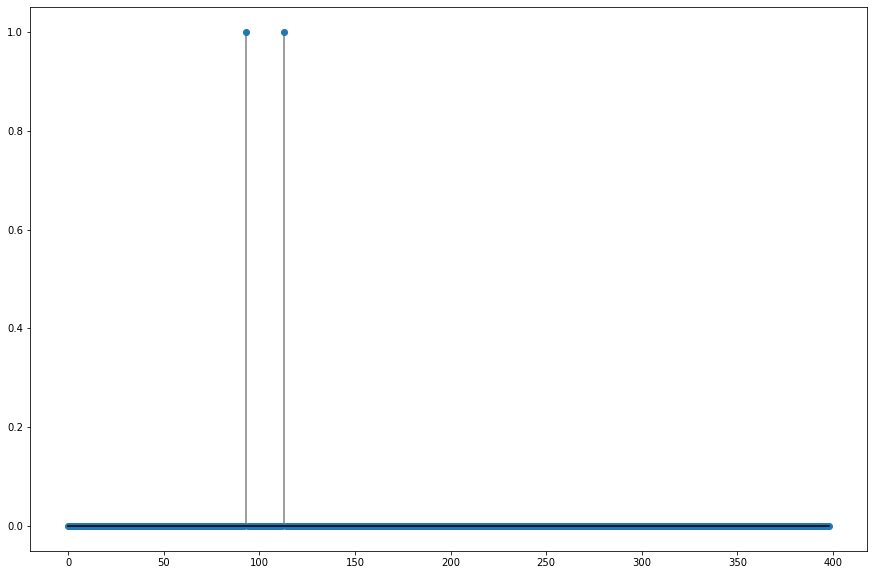

In [34]:
plt.figure(figsize=(15,10))
markerline, stemlines, baseline = plt.stem(
    range(len(us1)),dus, 
    linefmt='grey', markerfmt='o', bottom=0,basefmt='black')
# plt.stem(range(len(us1)),dus)

In [35]:
vpvs1=df1['VpVsRatio'].values
vpvs2=df2['VpVsRatio'].values

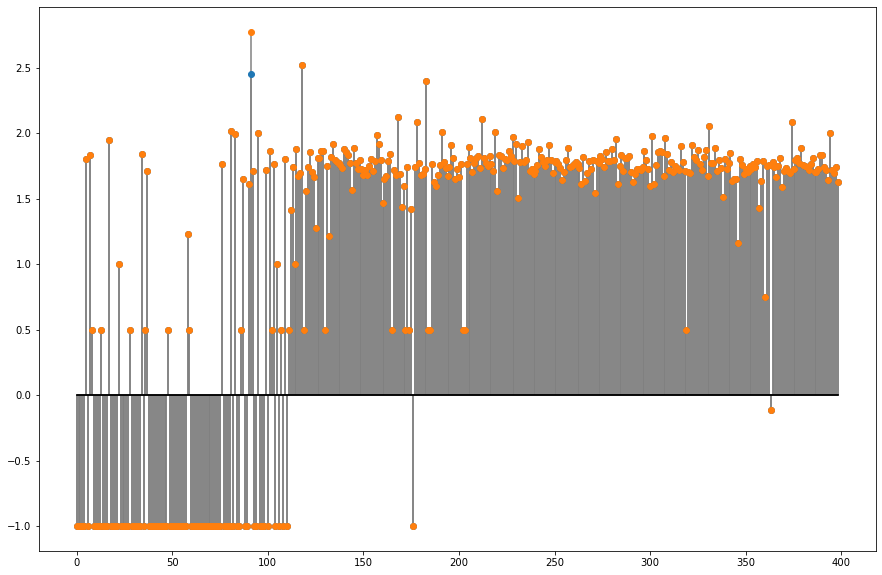

In [36]:
plt.figure(figsize=(15,10))
markerline, stemlines, baseline = plt.stem(
    range(len(vpvs1)),vpvs1, 
    linefmt='grey', markerfmt='o', bottom=0,basefmt='black')
# plt.figure(figsize=(15,10))
markerline, stemlines, baseline = plt.stem(
    range(len(vpvs2)),vpvs2, 
    linefmt='grey', markerfmt='o', bottom=0,basefmt='black')

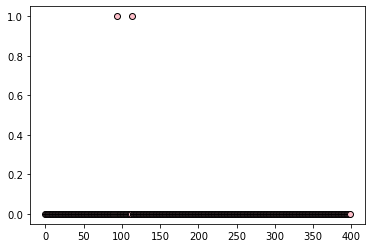

In [37]:
# plt.scatter(
# #     range(len(D2nsc['nphs'].values)),D2nsc['nphs'].values,
# #     range(len(vpvs1)),vpvs1, 
#     range(len(us1)),us1, 
#     color = 'purple',marker = 'o',edgecolor='k')
# plt.scatter(
# #     range(len(D3nsc['nphs'].values)),D3nsc['nphs'].values,
# #     range(len(vpvs2)),vpvs2,
#     range(len(us1)),us2, 
#     color = 'pink',marker = 'o',edgecolor='k')
plt.scatter(
#     range(len(D3nsc['nphs'].values)),D3nsc['nphs'].values,
#     range(len(vpvs2)),vpvs2,
    range(len(us1)),dus, 
    color = 'pink',marker = 'o',edgecolor='k')


In [38]:
ddf.iloc(ddf['dnphs'].index == -5)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
np.argmin(dnphs)

In [ ]:
ddf.iloc[103][0]